In [ ]:
# first neural network with keras tutorial
#from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import image
from matplotlib import pyplot
import os
import shutil
import numpy as np
from PIL import Image
import pickle
from sklearn.preprocessing import MultiLabelBinarizer


In [ ]:
mlb = MultiLabelBinarizer()
# load the train dataset
X_trainUnflat = pickle.load(open("train_X.p", 'rb'))
y_trainUnflat = pickle.load(open("train_Y.p", 'rb'))

print(X_trainUnflat.shape)
print(y_trainUnflat.shape)

X_train = X_trainUnflat.reshape(X_trainUnflat.shape[0],-1)
y_train = y_trainUnflat.reshape(y_trainUnflat.shape[0],-1)
y_train = mlb.fit_transform(y_train)

print(X_train.shape)
print(y_train.shape)

# load the dev dataset
X_devUnflat = pickle.load(open("dev_X.p", 'rb'))
y_devUnflat = pickle.load(open("dev_Y.p", 'rb'))

print(X_devUnflat.shape)
print(y_devUnflat.shape)

X_dev = X_devUnflat.reshape(X_devUnflat.shape[0],-1)
y_dev = y_devUnflat.reshape(y_devUnflat.shape[0],-1)
y_dev = mlb.fit_transform(y_dev)

print(X_dev.shape)
print(y_dev.shape)

# load the test dataset
X_testUnflat = pickle.load(open("test_X.p", 'rb'))
y_testUnflat = pickle.load(open("test_Y.p", 'rb'))

print(X_testUnflat.shape)
print(y_testUnflat.shape)

X_test = X_testUnflat.reshape(X_testUnflat.shape[0],-1)
y_test = y_testUnflat.reshape(y_testUnflat.shape[0],-1)
y_test = mlb.fit_transform(y_test)

print(X_test.shape)
print(y_test.shape)



(433, 208, 160, 3)
(433,)
(433, 99840)
(433, 3)
(93, 208, 160, 3)
(93,)
(93, 99840)
(93, 3)
(93, 208, 160, 3)
(93,)
(93, 99840)
(93, 3)


In [ ]:
numDims = X_train.shape[1]
numExamples = X_train.shape[0]
# neurons1 = int(numDims/2)
# neurons2 = int(numDims/4)
# neurons3 = int(numDims/8)
# neurons4 = int(numDims/120)
# neurons5 = int(numDims/240)
# neurons6 = int(numDims/480)
neurons1 = int(numDims/240)
neurons2 = int(numDims/480)
neurons3 = int(numDims/960)
neurons4 = int(numDims/1920)
neurons5 = int(numDims/3840)
neurons6 = int(numDims/7680)

print(neurons1)
print(neurons2)
print(neurons3)
print(neurons4)
print(neurons5)
print(neurons6)

416
208
104
52
26
13


In [ ]:
#HYPERPARAMETER SEARCH OVER EPOCH NUMBER
#We keep number of layers, neuron per layer, activation in each layer constant, batch size of 10 100? full?
batchSizes = [5,10,50,100,numExamples]
#batchSizes = [100]
#batchSize = numExamples #100 #10
#numEpochsToTest = [i for i in range(5,31)]
#numEpochsToTest = [i for i in range(10,20)]

#print(numEpochsToTest)
print(batchSizes)

[5, 10, 50, 100, 433]


In [ ]:
trainAccuracy = []
valAccuracy = []
trainLoss = []
valLoss = []

for batchSize in batchSizes:
  print("BatchSize : ", batchSize)
  model = Sequential()
  model.add(Dense(neurons1, input_dim=numDims, activation='relu'))
  model.add(Dense(neurons5, activation='relu'))
  model.add(Dense(neurons6, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  # compile the keras model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
  history = model.fit(X_train, y_train, epochs=5, batch_size=batchSize, validation_data = (X_dev, y_dev))
  historyDict = history.history
  #print(historyDict.keys())
  #trainAccuracy.append(historyDict["accuracy"])
  #valAccuracy.append(historyDict["val_accuracy"])
  trainLoss.append(historyDict['loss'])
  valLoss.append(historyDict['val_loss'])

BatchSize :  5
Epoch 1/5
87/87 [==============================] - 2s 21ms/step - loss: 766.1573 - categorical_accuracy: 0.4134 - val_loss: 143.6840 - val_categorical_accuracy: 0.4839
Epoch 2/5
87/87 [==============================] - 2s 18ms/step - loss: 382.8867 - categorical_accuracy: 0.4573 - val_loss: 156.4720 - val_categorical_accuracy: 0.4624
Epoch 3/5
87/87 [==============================] - 2s 18ms/step - loss: 250.4879 - categorical_accuracy: 0.5058 - val_loss: 297.2818 - val_categorical_accuracy: 0.4731
Epoch 4/5
87/87 [==============================] - 2s 18ms/step - loss: 102.2799 - categorical_accuracy: 0.5820 - val_loss: 126.9133 - val_categorical_accuracy: 0.4731
Epoch 5/5
87/87 [==============================] - 2s 18ms/step - loss: 136.6599 - categorical_accuracy: 0.6212 - val_loss: 255.3095 - val_categorical_accuracy: 0.5484
BatchSize :  10
Epoch 1/5
44/44 [==============================] - 2s 28ms/step - loss: 1026.7327 - categorical_accuracy: 0.4111 - val_loss: 81.5

[1, 2, 3, 4, 5]


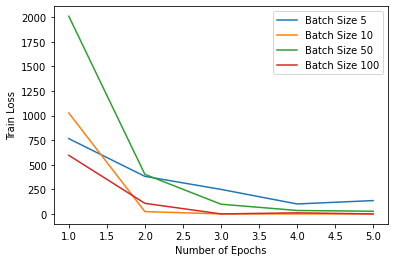

In [ ]:
#For Loss Plotting

x = [i for i in range(1,6)]
print(x)
yTrainLoss = trainLoss
#Train Loss
for i in range(len(batchSizes)-1):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yTrainLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Train Loss")
pyplot.show()

[1, 2, 3, 4, 5]


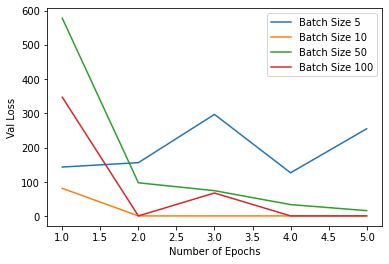

In [ ]:
#For Loss Plotting

x = [i for i in range(1,6)]
print(x)
yValLoss = valLoss
#Val Loss
for i in range(len(batchSizes)-1):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Loss")
pyplot.show()

In [ ]:
bestEpoch = 3
bestBatchSize = 5
bestmodel = Sequential()
bestmodel.add(Dense(neurons1, input_dim=numDims, activation='relu'))
bestmodel.add(Dense(neurons5, activation='relu'))
bestmodel.add(Dense(neurons6, activation='relu'))
bestmodel.add(Dense(3, activation='softmax'))
# compile the keras model
bestmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
bestmodel.fit(X_train, y_train, epochs=bestEpoch, batch_size=bestBatchSize, validation_data = (X_dev, y_dev))



# evaluate the keras model on test data
predictions = bestmodel.predict(X_test)
print(predictions)
#print(y_test)

Epoch 1/3
87/87 [==============================] - 2s 20ms/step - loss: 610.9398 - categorical_accuracy: 0.4457 - val_loss: 509.0786 - val_categorical_accuracy: 0.4301
Epoch 2/3
87/87 [==============================] - 2s 19ms/step - loss: 168.4758 - categorical_accuracy: 0.5058 - val_loss: 84.7087 - val_categorical_accuracy: 0.4731
Epoch 3/3
87/87 [==============================] - 2s 17ms/step - loss: 70.0739 - categorical_accuracy: 0.5266 - val_loss: 53.3556 - val_categorical_accuracy: 0.4839
[[1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 7.7677373e-25 1.1229255e-28]
 [1.0000000e+00 3.4003824e-31 1.0204403e-28]
 [1.0000000e+00 0.0000000e+00 1.5397148e-33]
 [1.0000000e+00 2.2531003e-34 3.8932747e-27]
 [1.0000000e+00 3.4988206e-23 8.1625239e-20]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.

In [ ]:
yTestNew = y_test.argmax(axis=1)
yPredNew = predictions.argmax(axis=1)

print(yTestNew)
print(yPredNew)

[0 0 0 1 0 1 2 0 1 1 0 2 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1
 2 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 2 1 1 2 0 2 1 0 2 2 0 1
 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


0.3172916666666666


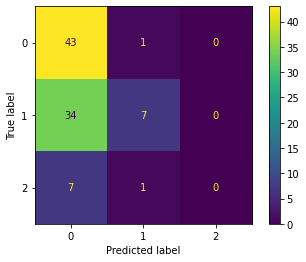

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
#
#invY = mlb.inverse_transform(y_test)
#print(invY)

cM = confusion_matrix(yTestNew,yPredNew)
#print(cM)

displayClasses = [i for i in range(3)]
#displayClasses = [i for i in range(2)]
#print(displayClasses)

print(f1_score(yTestNew, yPredNew, average='macro'))

disp = ConfusionMatrixDisplay(confusion_matrix=cM, display_labels=displayClasses)
disp.plot()
pyplot.show()